In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [15, 7]
from PIL import Image
import requests
from io import BytesIO

In [2]:
df=pd.read_csv('Fifa 23 Players Data.csv')

In [3]:
df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [5]:
df.isna().sum()

Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64

In [6]:
len(set(df['Club Name']))

679

In [7]:
len(set(df['National Team Name']))

36

Text(0.5, 1.0, 'Nationality vs Player count')

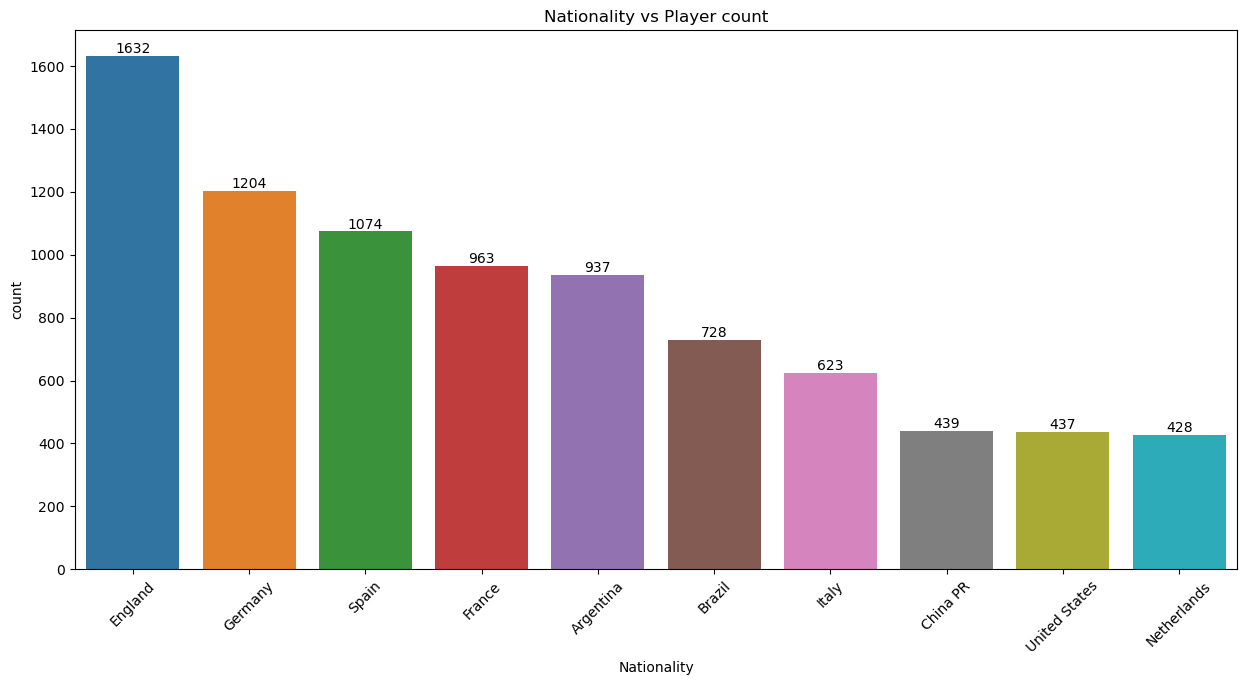

In [8]:
df2=df.groupby('Nationality')['Full Name'].count().reset_index(name='count').sort_values('count',ascending=False).head(10)
ax=sns.barplot(x=df2['Nationality'],y=df2['count'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.title('Nationality vs Player count')

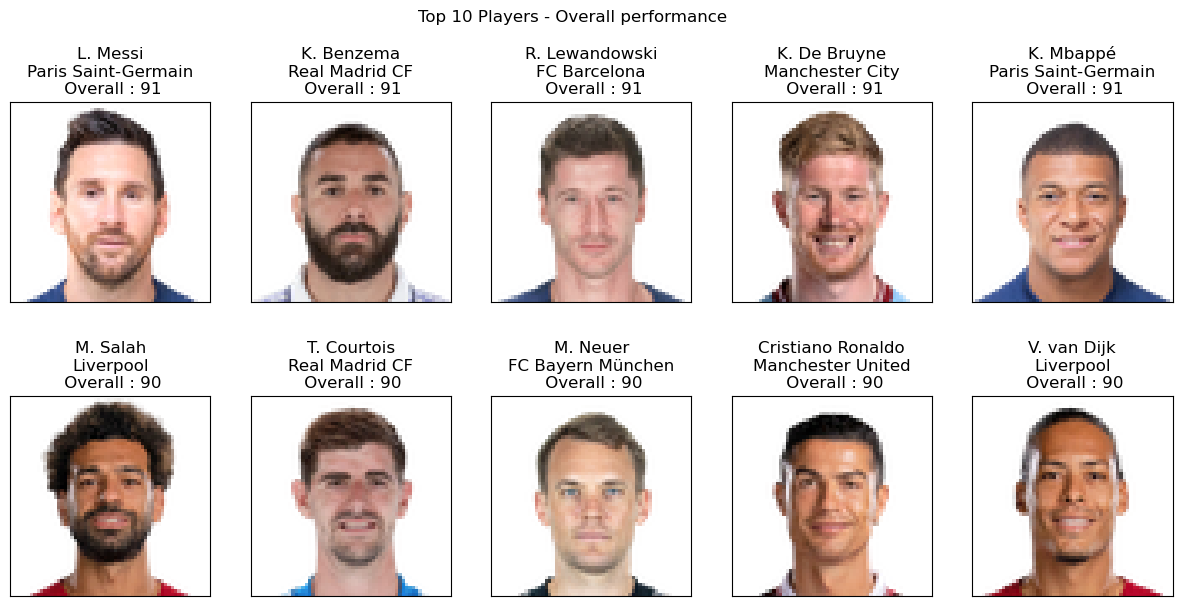

In [9]:
df2=df.sort_values(by='Overall', ascending=False)[['Known As','Image Link','Club Name','Overall']].head(10)
fig,ax=plt.subplots(2,5)
fig.suptitle('Top 10 Players - Overall performance')
k=-1
for i in range(2):
    for j in range(5):
        k+=1
        response = requests.get(df2.loc[k,'Image Link'])
        img = Image.open(BytesIO(response.content)) 
        ax[i,j].imshow(img)
        ax[i,j].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
        ax[i,j].title.set_text(df2.loc[k,'Known As']+'\n'+df2.loc[k,'Club Name']+'\n Overall : '+str(df2.loc[k,'Overall']))

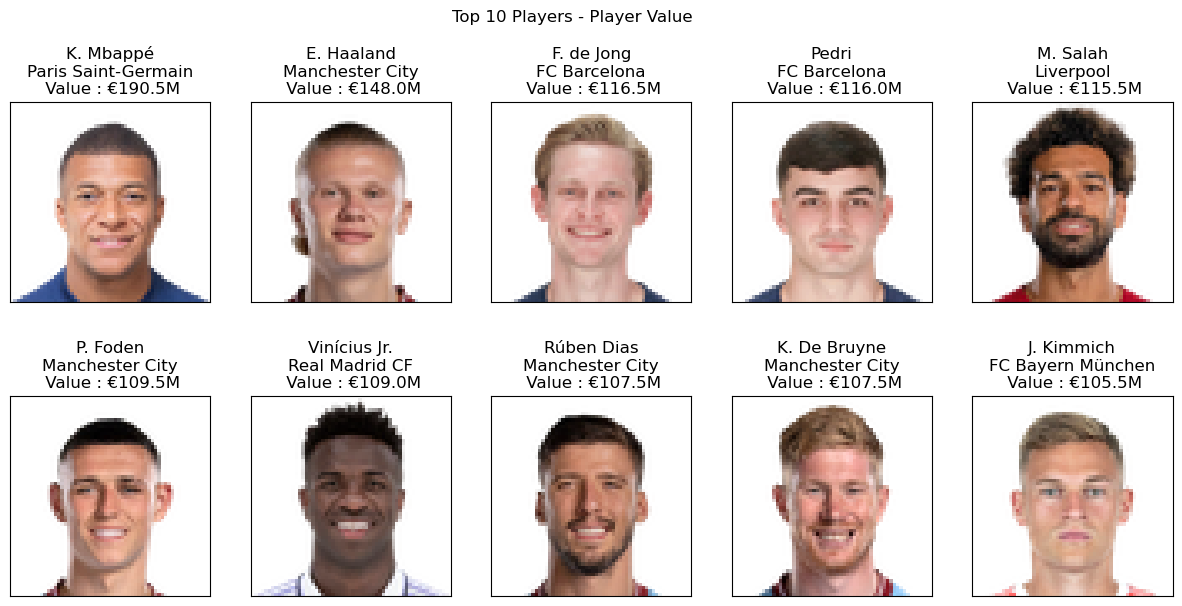

In [10]:
df2=df.sort_values(by='Value(in Euro)',ascending=False)[['Known As','Image Link','Club Name','Value(in Euro)']].head(10)
df2['Value(in Euro)']=df2['Value(in Euro)'].apply(lambda x : "€{:.1f}M".format((x/1000000)))
df2=df2.reset_index()
fig,ax=plt.subplots(2,5)
fig.suptitle('Top 10 Players - Player Value')
k=-1
for i in range(2):
    for j in range(5):
        k+=1
        response = requests.get(df2.loc[k,'Image Link'])
        img = Image.open(BytesIO(response.content)) 
        ax[i,j].imshow(img)
        ax[i,j].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
        ax[i,j].title.set_text(df2.loc[k,'Known As']+'\n'+df2.loc[k,'Club Name']+'\n Value : '+str(df2.loc[k,'Value(in Euro)']))

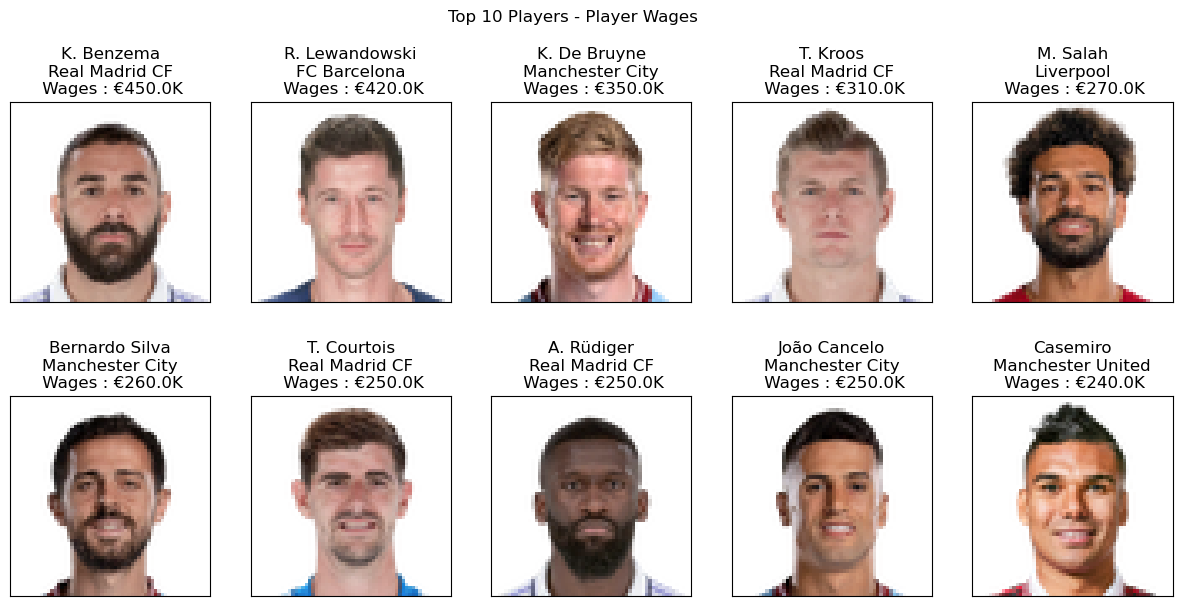

In [11]:
df2=df.sort_values(by='Wage(in Euro)',ascending=False)[['Known As','Image Link','Club Name','Wage(in Euro)']].head(10)
df2['Wage(in Euro)']=df2['Wage(in Euro)'].apply(lambda x : "€{:.1f}K".format((x/1000)))
df2=df2.reset_index()
fig,ax=plt.subplots(2,5)
fig.suptitle('Top 10 Players - Player Wages')
k=-1
for i in range(2):
    for j in range(5):
        k+=1
        response = requests.get(df2.loc[k,'Image Link'])
        img = Image.open(BytesIO(response.content)) 
        ax[i,j].imshow(img)
        ax[i,j].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
        ax[i,j].title.set_text(df2.loc[k,'Known As']+'\n'+df2.loc[k,'Club Name']+'\n Wages : '+str(df2.loc[k,'Wage(in Euro)']))

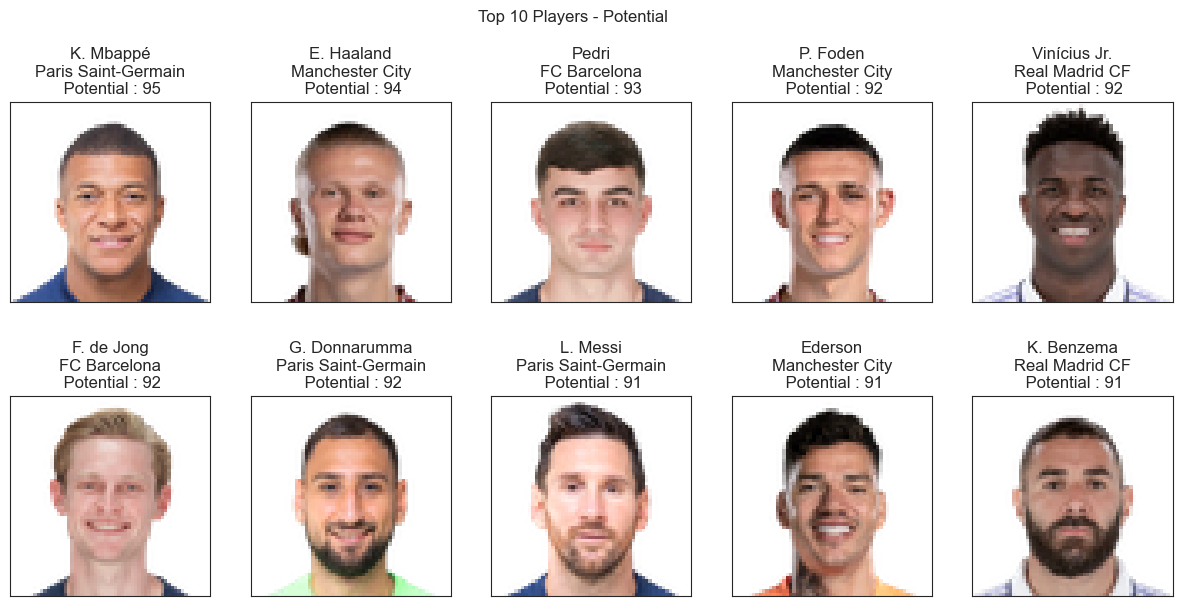

In [164]:
df2=df.sort_values(by='Potential',ascending=False)[['Known As','Image Link','Club Name','Potential']].head(10)
df2=df2.reset_index()
fig,ax=plt.subplots(2,5)
fig.suptitle('Top 10 Players - Potential')
k=-1
for i in range(2):
    for j in range(5):
        k+=1
        response = requests.get(df2.loc[k,'Image Link'])
        img = Image.open(BytesIO(response.content)) 
        ax[i,j].imshow(img)
        ax[i,j].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
        ax[i,j].title.set_text(df2.loc[k,'Known As']+'\n'+df2.loc[k,'Club Name']+'\n Potential : '+str(df2.loc[k,'Potential']))